In [1]:
import sys
import pickle
sys.path.append('../helper_functions')  # Add the helper_functions folder to the path

import cmc_exp
from cmc_generate_protocol import make_OTFlex_protocol
import pickle
import numpy as np


In [2]:
#for surfactant in ["SDS", "DTAB", "TTAB", "CAPB"]:
for surfactant in cmc_exp.surfactant_library:

    print(surfactant, cmc_exp.surfactant_library[surfactant]['full_name'], cmc_exp.surfactant_library[surfactant]['Category'])
    print("Reported CMC        : ", cmc_exp.surfactant_library[surfactant]['CMC'], "mM")

#    conc_in_mM=50

    conc_in_mM = cmc_exp.surfactant_library[surfactant]['stock_conc']
    conc_in_mg_mL = cmc_exp.mM_to_mg_per_mL(surfactant, conc_in_mM)
    print("Stock Concentration : ", conc_in_mM, "mM; ", round(conc_in_mg_mL,2), "mg/mL")
    print()

SDS Sodium Dodecyl Sulfate anionic
Reported CMC        :  8.5 mM
Stock Concentration :  50 mM;  14.47 mg/mL

NaDC Sodium Docusate anionic
Reported CMC        :  5.3375 mM
Stock Concentration :  25 mM;  11.14 mg/mL

NaC Sodium Cholate anionic
Reported CMC        :  14 mM
Stock Concentration :  50 mM;  21.58 mg/mL

CTAB Hexadecyltrimethylammonium Bromide cationic
Reported CMC        :  1.07 mM
Stock Concentration :  5 mM;  1.82 mg/mL

DTAB Dodecyltrimethylammonium Bromide cationic
Reported CMC        :  15.85 mM
Stock Concentration :  50 mM;  15.42 mg/mL

TTAB Tetradecyltrimethylammonium Bromide cationic
Reported CMC        :  3.985 mM
Stock Concentration :  50 mM;  16.82 mg/mL

P188 Kolliphor® P 188 Geismar nonionic
Reported CMC        :  0.48 mM
Stock Concentration :  2 mM;  17.19 mg/mL

P407 Kolliphor® P 407 Geismar nonionic
Reported CMC        :  0.5 mM
Stock Concentration :  2 mM;  24.6 mg/mL

CAPB Cocamidopropyl Betaine zwitterionic
Reported CMC        :  0.627 mM
Stock Concentrati

In [3]:
#for surfactant in ["SDS", "DTAB", "TTAB", "CAPB"]:
for surfactant in cmc_exp.surfactant_library:

    print(surfactant, cmc_exp.surfactant_library[surfactant]['full_name'])
    print()

SDS Sodium Dodecyl Sulfate

NaDC Sodium Docusate

NaC Sodium Cholate

CTAB Hexadecyltrimethylammonium Bromide

DTAB Dodecyltrimethylammonium Bromide

TTAB Tetradecyltrimethylammonium Bromide

P188 Kolliphor® P 188 Geismar

P407 Kolliphor® P 407 Geismar

CAPB Cocamidopropyl Betaine

CHAPS CHAPS



In [4]:
# Define experiments

list_of_surfactants_1 = ['SDS', None, None]
list_of_ratios_1 = [1, 0., 0.]

list_of_surfactants_2 = ['SDS', 'NaDC', None]
list_of_ratios_2 = [0.7, 0.3, 0.0]

# list_of_surfactants_3 = ['BAC', 'P188', 'P407']
# list_of_ratios_3 = [0.2, 0.5, 0.3]

In [5]:
list_of_surfactants_all = [list_of_surfactants_1, list_of_surfactants_2]
list_of_ratios_all = [list_of_ratios_1, list_of_ratios_2]

In [6]:
for i in range(len(list_of_surfactants_all)):
    exp, small_exp = cmc_exp.generate_exp(list_of_surfactants_all[i], list_of_ratios_all[i])
    globals()[f"exp_{i+1}"] = exp
    globals()[f"small_exp_{i+1}"] = small_exp

    # Save
    with open( f"exp_{i+1}.pkl", "wb") as f:
        pickle.dump({"exp": exp, "small_exp": small_exp}, f)


This batch of surfactants are: 
['SDS', None, None]
This batch of ratios are: 
[1, 0.0, 0.0]

CMC estimate: 
8.5

Generated concentrations (refined): 
[ 3.4         4.38938113  5.66666667  6.375       7.225       8.075
  8.925       9.775      10.625      12.75       16.46017922 21.25      ]
Sub-stock concentration: 
21.90721649484536 mM

Experiment volume info:
{'surfactant_sub_stock_vols': {'SDS': 2190.721649484536, 'None_2': 0, 'None_3': 0, 'water': 2809.278350515464}, 'solvent_sub_vol': [150.54, 194.35, 250.91, 282.27, 319.91, 357.54, 395.18, 432.81, 470.45, 564.54, 728.82, 940.9], 'water_vol': [819.46, 775.65, 719.09, 687.73, 650.09, 612.46, 574.82, 537.19, 499.55, 405.46, 241.18, 29.1], 'pyrene_vol': [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]}
This batch of surfactants are: 
['SDS', 'NaDC', None]
This batch of ratios are: 
[0.7, 0.3, 0.0]

CMC estimate: 
7.217140584609266

Generated concentrations (refined): 
[ 2.88685623  3.72691537  4.81142706  5.41285544  6.1345695   6.8

In [7]:
list_of_surfactants = list_of_surfactants_2
list_of_ratios = list_of_ratios_2

cmc_estiamte = cmc_exp.CMC_estimate(list_of_surfactants, list_of_ratios)
cmc_estiamte

This batch of surfactants are: 
['SDS', 'NaDC', None]
This batch of ratios are: 
[0.7, 0.3, 0.0]



7.217140584609266

In [8]:
conc = cmc_exp.rough_generate_cmc_concentrations(list_of_surfactants, list_of_ratios, cmc_estiamte, number_of_points=12 ,scale="log") # low/high in mM

conc


CMC estimate: 
7.217140584609266

Generated concentrations (rough): 
[ 1.021  1.404  1.931  2.655  3.651  5.021  6.905  9.496 13.059 17.959
 24.697 33.963]


[1.021,
 1.404,
 1.931,
 2.655,
 3.651,
 5.021,
 6.905,
 9.496,
 13.059,
 17.959,
 24.697,
 33.963]

In [9]:
cmc_exp.surfactant_substock(conc, list_of_surfactants, list_of_ratios,probe_volume=30, sub_stock_volume=6000, CMC_sample_volume=1000, stock_concs=[50,25,0])

Sub-stock concentration: 
35.01340206185567 mM



(35.01340206185567,
 {'SDS': 2941.125773195876,
  'NaDC': 2520.964948453608,
  'None_3': 0,
  'water': 537.9092783505166})

In [10]:
list_of_exps = {
    'exp1': small_exp_1,
    'exp2': small_exp_2,
    #'exp3': small_exp_3,
    # 'exp4': small_exp_4,
    # 'exp5': small_exp_5,
    # 'exp6': small_exp_6,
    # 'exp7': small_exp_7,
    # 'exp8': small_exp_8,
    }

In [11]:
template_file_path = '../helper_functions/cmc_OTFlex_protocol.py'
output_file_path = '20250422.py'

In [12]:
make_OTFlex_protocol(list_of_exps = list_of_exps, 
                     template_file_path = template_file_path, 
                     output_file_path =output_file_path, 
                     solvent_mix_loc = 'B1', 
                     row = 'G')

In [13]:
with open("exp_2.pkl", "rb") as f:
    data = pickle.load(f)

data

{'exp': {'list_of_surfactants': ['SDS', 'NaDC', None],
  'list_of_ratios': [0.7, 0.3, 0.0],
  'original_surfactant_stock_concs': [50, 25, 0],
  'surfactant_sub_stock_conc': 18.600877795384708,
  'surfactant_sub_stock_vols': {'SDS': 1302.0614456769295,
   'NaDC': 1116.0526677230823,
   'None_3': 0,
   'water': 2581.885886599988},
  'estimated_CMC': 7.217140584609266,
  'df':     concentration  surfactant volume  water volume  probe volume  total volume
  0        2.886856             150.54        819.46            30        1000.0
  1        3.726915             194.35        775.65            30        1000.0
  2        4.811427             250.91        719.09            30        1000.0
  3        5.412855             282.27        687.73            30        1000.0
  4        6.134569             319.91        650.09            30        1000.0
  5        6.856284             357.54        612.46            30        1000.0
  6        7.577998             395.18        574.82      

In [14]:
with open("exp_2.pkl", "rb") as f:
    data = pickle.load(f)

data

{'exp': {'list_of_surfactants': ['SDS', 'NaDC', None],
  'list_of_ratios': [0.7, 0.3, 0.0],
  'original_surfactant_stock_concs': [50, 25, 0],
  'surfactant_sub_stock_conc': 18.600877795384708,
  'surfactant_sub_stock_vols': {'SDS': 1302.0614456769295,
   'NaDC': 1116.0526677230823,
   'None_3': 0,
   'water': 2581.885886599988},
  'estimated_CMC': 7.217140584609266,
  'df':     concentration  surfactant volume  water volume  probe volume  total volume
  0        2.886856             150.54        819.46            30        1000.0
  1        3.726915             194.35        775.65            30        1000.0
  2        4.811427             250.91        719.09            30        1000.0
  3        5.412855             282.27        687.73            30        1000.0
  4        6.134569             319.91        650.09            30        1000.0
  5        6.856284             357.54        612.46            30        1000.0
  6        7.577998             395.18        574.82      

In [36]:
sum(data['small_exp']['solvent_sub_vol'])

5088.219999999999

In [37]:
data['small_exp']

{'surfactant_sub_stock_vols': {'SDS': 25.063684197088108,
  'P407': 626.5921049272027,
  'NaDC': 66.83649119223496,
  'water': 4281.5077196834745},
 'solvent_sub_vol': [150.54,
  194.35,
  250.91,
  282.27,
  319.91,
  357.54,
  395.18,
  432.81,
  470.45,
  564.54,
  728.82,
  940.9],
 'water_vol': [819.46,
  775.65,
  719.09,
  687.73,
  650.09,
  612.46,
  574.82,
  537.19,
  499.55,
  405.46,
  241.18,
  29.1],
 'pyrene_vol': [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]}

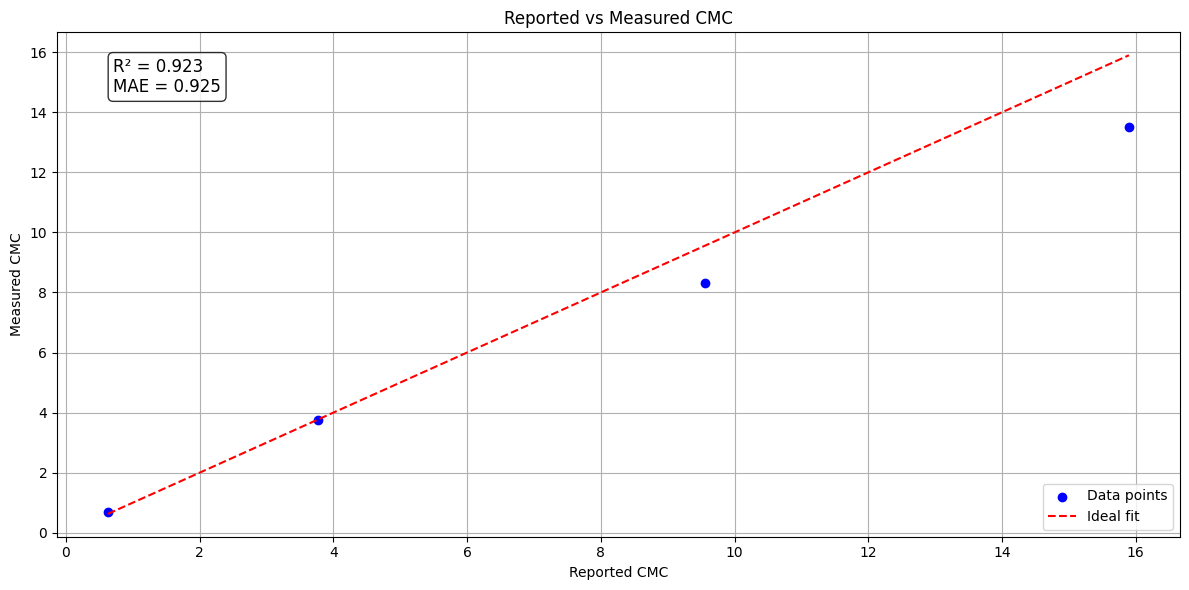

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Data
reported_cmc = [9.56, 15.9, 3.77, 0.63]
measured_cmc = [8.30, 13.52, 3.77, 0.69]

# Compute metrics
r2 = r2_score(measured_cmc, reported_cmc)
mae = mean_absolute_error(measured_cmc, reported_cmc)
mse = mean_squared_error(measured_cmc, reported_cmc)
rmse = np.sqrt(mse)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(reported_cmc, measured_cmc, color='blue', label='Data points')
plt.plot([min(reported_cmc), max(reported_cmc)],
         [min(reported_cmc), max(reported_cmc)], color='red', linestyle='--', label='Ideal fit')
plt.xlabel('Reported CMC')
plt.ylabel('Measured CMC')
plt.title('Reported vs Measured CMC')

# Add text box with metrics
textstr = f'R² = {r2:.3f}\nMAE = {mae:.3f}'
plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
               fontsize=12, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:

def rough_search(low=0.1, high=20, number=12):
    exponent_low = np.round(np.log10(low), 3)
    exponent_high = np.round(np.log10(high), 3)
    concentrations = np.round(np.logspace(exponent_low, exponent_high, number), 3)
    return concentrations.tolist()


In [40]:

def rough_generate_cmc_concentrations(estimate_cmc, number=12 ,scale="log"): # low/high in mM

    # how does it affect the substock preparation and the vols added to the 48 wellplate? 
    
    low = estimate_cmc / (20**0.5)
    high = estimate_cmc * (20**0.5)

    if scale == "log":
        exponent_low = np.round(np.log10(low), 3)
        exponent_high = np.round(np.log10(high), 3)
        concentrations = np.round(np.logspace(exponent_low, exponent_high, number), 3)
    
    elif scale == "linear":
        concentrations = np.round(np.linspace(low, high, number), 3)

    return concentrations.tolist()

In [41]:
aa = rough_generate_cmc_concentrations(5)
aa

[1.117,
 1.466,
 1.926,
 2.528,
 3.32,
 4.359,
 5.723,
 7.515,
 9.867,
 12.956,
 17.011,
 22.336]

In [42]:
results_20250618 = {

    "SDS": 9.16,
    "CAPB": 0.78,
    "CHAPS": 6.93,
    "CTAB": 0.98,
    "DTAB": 17.42,
    "NaC": 15.12,
    "NaDC": 6.14,
    "P407": 0.1,
    "P188": 0.42,
    "TTAB": 3.73,


}

In [43]:
import matplotlib.pyplot as plot

def result_analysis(results):

    reported_cmc = []
    measured_cmc = []

    for surfactant in cmc_exp.surfactant_library:
        print(surfactant)
        print("Reported CMC        : ", cmc_exp.surfactant_library[surfactant]['CMC'], "mM")
        print("Measured CMC        : ", results[surfactant], "mM")
        print("Difference          : ", round(cmc_exp.surfactant_library[surfactant]['CMC'] - results[surfactant], 2), "mM")
        print()

        reported_cmc.append(cmc_exp.surfactant_library[surfactant]['CMC'])
        measured_cmc.append(results[surfactant])
    
    # Compute metrics
    r2 = r2_score(measured_cmc, reported_cmc)
    mae = mean_absolute_error(measured_cmc, reported_cmc)

    print("R² = ", round(r2,2))
    print("MAE = ", round(mae,2), "mM")

    plot.figure(figsize=(12, 6))
    plot.scatter(reported_cmc, measured_cmc, color='blue', label='Data points')

    # plot ideal fit line
    plot.plot([min(reported_cmc), max(reported_cmc)],
              [min(reported_cmc), max(reported_cmc)], color='red', linestyle='--', label='Ideal fit')
    plot.xlabel('Reported CMC (mM)')
    plot.ylabel('Measured CMC (mM)')
    plot.title('Reported vs Measured CMC')

    # Add text box with metrics
    textstr = f'R² = {r2:.3f}\nMAE = {mae:.3f} mM'
    plot.gca().text(0.05, 0.95, textstr, transform=plot.gca().transAxes,
                    fontsize=12, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    plot.legend()
    

SDS
Reported CMC        :  8.3 mM
Measured CMC        :  9.16 mM
Difference          :  -0.86 mM

NaDC
Reported CMC        :  8.2 mM
Measured CMC        :  6.14 mM
Difference          :  2.06 mM

NaC
Reported CMC        :  14 mM
Measured CMC        :  15.12 mM
Difference          :  -1.12 mM

CTAB
Reported CMC        :  0.93 mM
Measured CMC        :  0.98 mM
Difference          :  -0.05 mM

DTAB
Reported CMC        :  15.85 mM
Measured CMC        :  17.42 mM
Difference          :  -1.57 mM

TTAB
Reported CMC        :  3.77 mM
Measured CMC        :  3.73 mM
Difference          :  0.04 mM

P188
Reported CMC        :  0.325 mM
Measured CMC        :  0.42 mM
Difference          :  -0.09 mM

P407
Reported CMC        :  0.1 mM
Measured CMC        :  0.1 mM
Difference          :  0.0 mM

CAPB
Reported CMC        :  0.627 mM
Measured CMC        :  0.78 mM
Difference          :  -0.15 mM

CHAPS
Reported CMC        :  8.5 mM
Measured CMC        :  6.93 mM
Difference          :  1.57 mM

R² =  0.

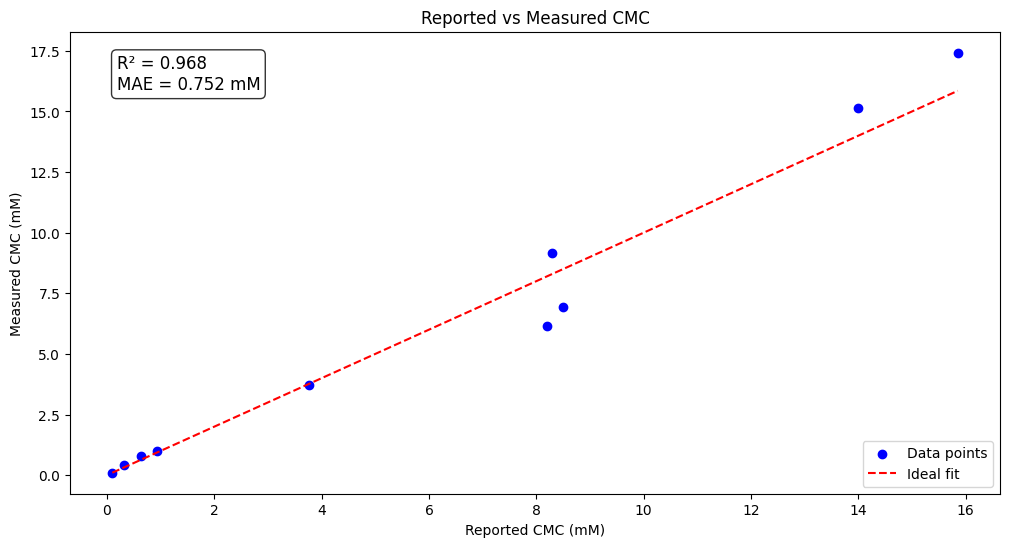

In [44]:
result_analysis(results_20250618)

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_png_images_from_folder(folder_path):

    if not os.path.isdir(folder_path):
        print(f"Error: '{folder_path}' is not a valid directory.")
        return

    png_files = [f for f in os.listdir(folder_path) if f.lower().endswith('.png')]

    if not png_files:
        print("No .png files found in the specified folder.")
        return

    for i, file_name in enumerate(png_files, start=1):
        img_path = os.path.join(folder_path, file_name)
        img = mpimg.imread(img_path)
        plt.figure()
        plt.imshow(img)
        plt.title(f"Image {i}: {file_name}")
        plt.axis('off')

    plt.show()


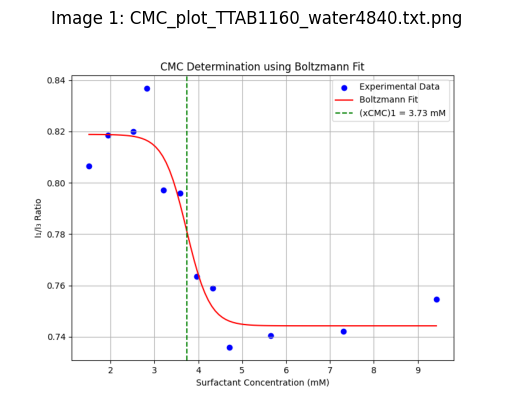

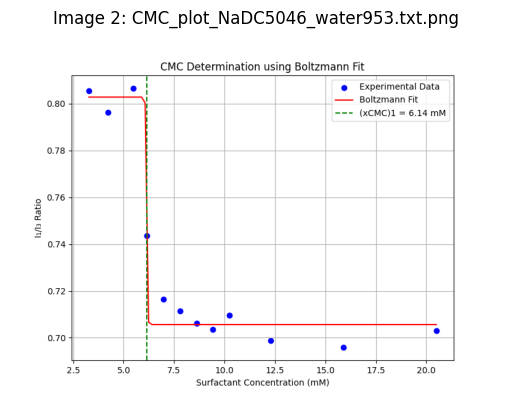

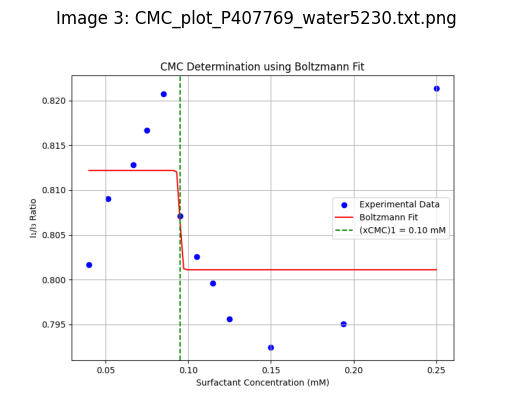

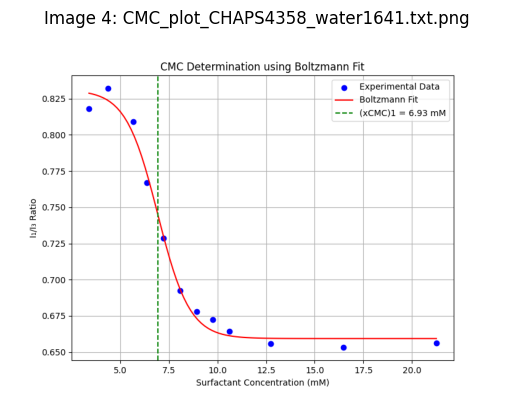

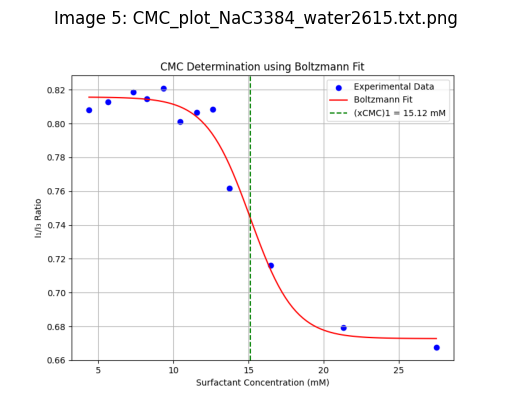

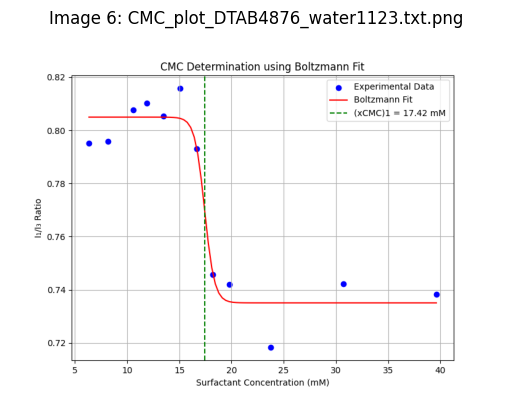

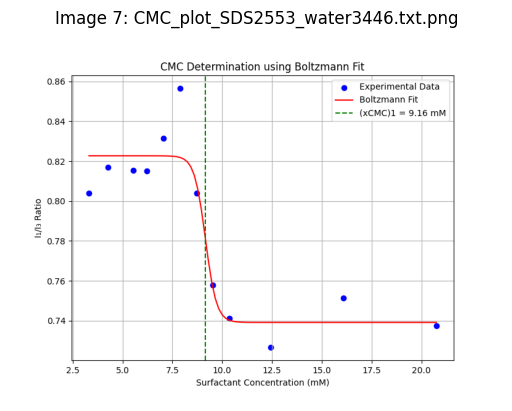

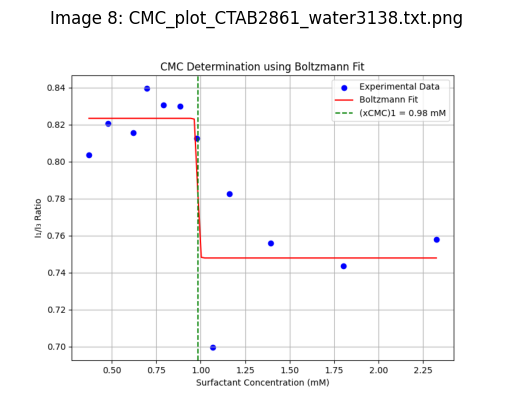

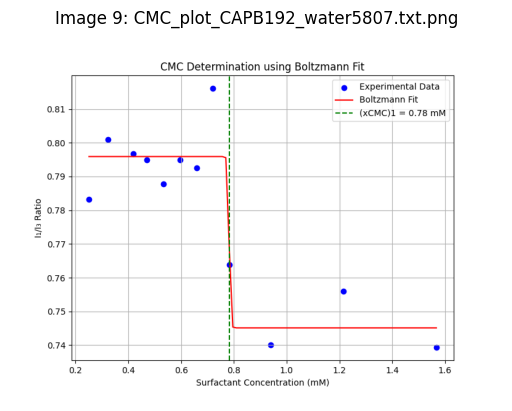

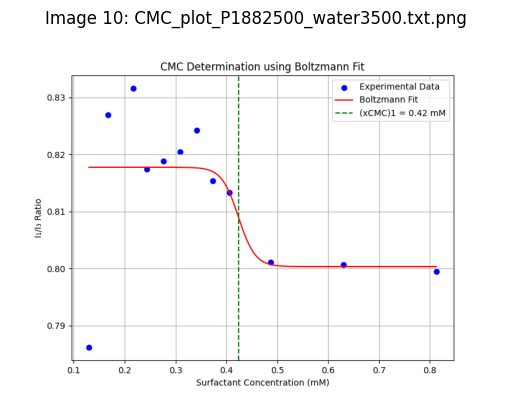

In [46]:
plot_png_images_from_folder('/Users/zeqing/Downloads/20250617_131732')
